In [53]:
from shapely.geometry import Point, Polygon
import h3
import geopandas as gpd
import folium
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [54]:
# 남산의 좌표, 강남의 좌표를 준비합니다.
namsan_lat = 37.56421
namsan_lng = 127.0016

gangnam_lat = 37.50881
gangnam_lng = 127.04097

In [55]:
# 좌표를 H3 단위로 변환합니다.
namsan_h3_r7 = h3.geo_to_h3(lat=namsan_lat, lng=namsan_lng, resolution=7)
namsan_h3_r8 = h3.geo_to_h3(lat=namsan_lat, lng=namsan_lng, resolution=8)
gangnam_h3_r7 = h3.geo_to_h3(lat=gangnam_lat, lng=gangnam_lng, resolution=7)
gangnam_h3_r8 = h3.geo_to_h3(lat=gangnam_lat, lng=gangnam_lng, resolution=8)

print(namsan_h3_r7, namsan_h3_r8, gangnam_h3_r7, gangnam_h3_r8)

8730e1d88ffffff 8830e1d88bfffff 8730e1ca3ffffff 8830e1ca39fffff


In [56]:
# 지도상 표현하기 위한 폴리곤을 리턴해주는 함수를 만듭니다.
def make_polygon(k):
    return Polygon(h3.h3_to_geo_boundary(k, geo_json=True))

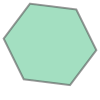

In [57]:
# H3 를 인풋으로 넣으면 폴리곤을 돌려줍니다.
make_polygon(namsan_h3_r7)

In [58]:
# 폴리곤 데이터 타입을 읽기 위한 GeoDataFrame를 선언합니다.
seoul_example_h3 = [namsan_h3_r7, namsan_h3_r8, gangnam_h3_r7, gangnam_h3_r8]
df = gpd.GeoDataFrame({'h3': seoul_example_h3})
df['geometry'] = df['h3'].apply(make_polygon)
df.crs = {'init': 'epsg:4326'}

In [59]:
df

,h3,geometry
0,8730e1d88ffffff,"POLYGON ((127.00862 37.55554, 127.00339 37.566..."
1,8830e1d88bfffff,"POLYGON ((127.00390 37.56184, 127.00339 37.566..."
2,8730e1ca3ffffff,"POLYGON ((127.05899 37.49930, 127.05377 37.509..."
3,8830e1ca39fffff,"POLYGON ((127.04638 37.50516, 127.04587 37.509..."


In [60]:
# 맵에 데이터 프레임을 추가한 후 출력합니다.
m = folium.Map([namsan_lat, namsan_lng])
folium.GeoJson(df).add_to(m)
m

In [61]:
# 이웃 H3 를 가져오기 위해서는 hex_ring 메소드를 활용합니다.
gangnam_h3_neighbor = list(h3.hex_ring(gangnam_h3_r8))
print(gangnam_h3_neighbor)

['8830e1ca15fffff', '8830e1ca03fffff', '8830e1ca07fffff', '8830e1ca3bfffff', '8830e1ca3dfffff', '8830e1ca31fffff']


In [62]:
# 데이터프레임을 생성해, 맵에 출력합니다.
df = gpd.GeoDataFrame({'h3': gangnam_h3_neighbor})
df['geometry'] = df['h3'].apply(make_polygon)
df.crs = {'init': 'epsg:4326'}

m = folium.Map([namsan_lat, namsan_lng])
folium.GeoJson(df).add_to(m)
m

# 6개의 이웃이 출력되었습니다.

In [63]:
df

,h3,geometry
0,8830e1ca15fffff,"POLYGON ((127.04956 37.51190, 127.04905 37.516..."
1,8830e1ca03fffff,"POLYGON ((127.04166 37.51146, 127.04115 37.515..."
2,8830e1ca07fffff,"POLYGON ((127.03848 37.50473, 127.03797 37.509..."
3,8830e1ca3bfffff,"POLYGON ((127.05428 37.50560, 127.05377 37.509..."
4,8830e1ca3dfffff,"POLYGON ((127.04320 37.49843, 127.04268 37.502..."
5,8830e1ca31fffff,"POLYGON ((127.05109 37.49886, 127.05058 37.503..."


In [64]:
# 이웃 H3 를 가져오기 위해서는 h3_to_children 메소드를 활용합니다.
namsan_h3_children = list(h3.h3_to_children(namsan_h3_r7))
print(namsan_h3_children)

['8830e1d887fffff', '8830e1d883fffff', '8830e1d881fffff', '8830e1d88bfffff', '8830e1d885fffff', '8830e1d88dfffff', '8830e1d889fffff']


In [65]:
namsan_h3_children.append(namsan_h3_r7)
print(namsan_h3_children)

['8830e1d887fffff', '8830e1d883fffff', '8830e1d881fffff', '8830e1d88bfffff', '8830e1d885fffff', '8830e1d88dfffff', '8830e1d889fffff', '8730e1d88ffffff']


In [66]:
# 데이터프레임을 생성해, 맵에 출력합니다.
df = gpd.GeoDataFrame({'h3': namsan_h3_children})
df['geometry'] = df['h3'].apply(make_polygon)
df.crs = {'init': 'epsg:4326'}

m = folium.Map([namsan_lat, namsan_lng])
folium.GeoJson(df).add_to(m)
m

# namsan_h3_r7 와 Children h3 들이 함께 출력되는 것을 확인할 수 있습니다.

In [69]:
df = gpd.GeoDataFrame({'h3': namsan_h3_children})
df

,h3
0,8830e1d887fffff
1,8830e1d883fffff
2,8830e1d881fffff
3,8830e1d88bfffff
4,8830e1d885fffff
5,8830e1d88dfffff
6,8830e1d889fffff
7,8730e1d88ffffff


In [70]:
df['geometry'] = df['h3'].apply(make_polygon)
df

,h3,geometry
0,8830e1d887fffff,"POLYGON ((127.00544 37.54880, 127.00493 37.553..."
1,8830e1d883fffff,"POLYGON ((127.00862 37.55554, 127.00811 37.559..."
2,8830e1d881fffff,"POLYGON ((127.00072 37.55510, 127.00021 37.559..."
3,8830e1d88bfffff,"POLYGON ((127.00390 37.56184, 127.00339 37.566..."
4,8830e1d885fffff,"POLYGON ((126.99755 37.54836, 126.99703 37.552..."
5,8830e1d88dfffff,"POLYGON ((126.99282 37.55466, 126.99231 37.559..."
6,8830e1d889fffff,"POLYGON ((126.99600 37.56139, 126.99549 37.565..."
7,8730e1d88ffffff,"POLYGON ((127.00862 37.55554, 127.00339 37.566..."


### tooltip 추가하기

In [76]:
# H3 와 H3 갯수 만큼의 더미 데이터를 생성합니다
namsan_h3_children = list(h3.h3_to_children(namsan_h3_r7))
dummy_demand = np.random.randint(0, len(namsan_h3_children), size=len(namsan_h3_children))*1000

In [77]:
# 데이터프레임을 생성합니다
df = gpd.GeoDataFrame( {'h3': namsan_h3_children,
                       'demand_cnt': dummy_demand})

df['geometry'] = df['h3'].apply(make_polygon)
df.crs = {'init': 'epsg:4326'}

df

,h3,demand_cnt,geometry
0,8830e1d887fffff,1000,"POLYGON ((127.00544 37.54880, 127.00493 37.553..."
1,8830e1d883fffff,4000,"POLYGON ((127.00862 37.55554, 127.00811 37.559..."
2,8830e1d881fffff,1000,"POLYGON ((127.00072 37.55510, 127.00021 37.559..."
3,8830e1d88bfffff,2000,"POLYGON ((127.00390 37.56184, 127.00339 37.566..."
4,8830e1d885fffff,1000,"POLYGON ((126.99755 37.54836, 126.99703 37.552..."
5,8830e1d88dfffff,6000,"POLYGON ((126.99282 37.55466, 126.99231 37.559..."
6,8830e1d889fffff,5000,"POLYGON ((126.99600 37.56139, 126.99549 37.565..."


In [78]:
m = folium.Map([namsan_lat, namsan_lng], zoom_start=12)

tootip = folium.GeoJsonTooltip(fields=['demand_cnt', 'h3'])
folium.GeoJson(df, tooltip = tootip).add_to(m)

m

# 아래와 같이 H3 별 정보를 담은 툴팁이 생겼습니다.

In [ ]:
.